In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

In [20]:
# ---------------- LOAD DATA ----------------
try:
    data = pd.read_csv("car data.csv")   # ✅ local downloaded file
    print("Car dataset loaded successfully")
except FileNotFoundError:
    print("ERROR: 'car data.csv' not found. Keep the file in the same folder.")

Car dataset loaded successfully


In [21]:
# Drop non-useful column
data.drop('Car_Name', axis=1, inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    data[col] = le.fit_transform(data[col])

In [22]:
#Part 1
print("\n--- CLASSIFICATION RESULTS (Fuel Type) ---")

X_cls = data.drop('Fuel_Type', axis=1)
y_cls = data['Fuel_Type']

scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)

X_train, X_test, y_train, y_test = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)

cls_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

cls_results = []

print(f"{'Model':<20} | {'Acc':<6} | {'Prec':<6} | {'Rec':<6} | {'F1':<6}")

for name, model in cls_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    cls_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"{name:<20} | {acc:.2f}   | {prec:.2f}   | {rec:.2f}   | {f1:.2f}")


--- CLASSIFICATION RESULTS (Fuel Type) ---
Model                | Acc    | Prec   | Rec    | F1    
Logistic Regression  | 0.82   | 0.82   | 0.82   | 0.79
Decision Tree        | 0.79   | 0.77   | 0.79   | 0.78
Random Forest        | 0.89   | 0.89   | 0.89   | 0.88
SVM                  | 0.80   | 0.84   | 0.80   | 0.75
KNN                  | 0.89   | 0.88   | 0.89   | 0.88
Naive Bayes          | 0.49   | 0.65   | 0.49   | 0.55


In [23]:
#Part 2
print("\n--- REGRESSION RESULTS (Selling Price) ---")

X_reg = data.drop('Selling_Price', axis=1)
y_reg = data['Selling_Price']

X_reg_scaled = scaler.fit_transform(X_reg)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

reg_models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

reg_results = []

print(f"{'Model':<20} | {'R2':<6} | {'MAE':<8} | {'MSE':<8}")

for name, model in reg_models.items():
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)

    r2 = r2_score(y_test_r, y_pred)
    mae = mean_absolute_error(y_test_r, y_pred)
    mse = mean_squared_error(y_test_r, y_pred)

    reg_results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse
    })

    print(f"{name:<20} | {r2:.2f}   | {mae:.2f}    | {mse:.2f}")


--- REGRESSION RESULTS (Selling Price) ---
Model                | R2     | MAE      | MSE     
Linear Regression    | 0.85   | 1.22    | 3.53
Ridge                | 0.85   | 1.22    | 3.54
Lasso                | 0.68   | 1.96    | 7.45
Decision Tree        | 0.94   | 0.74    | 1.30
Random Forest        | 0.96   | 0.62    | 0.95
SVR                  | 0.78   | 0.99    | 5.08
KNN                  | 0.94   | 0.64    | 1.30



Generating Graphs...


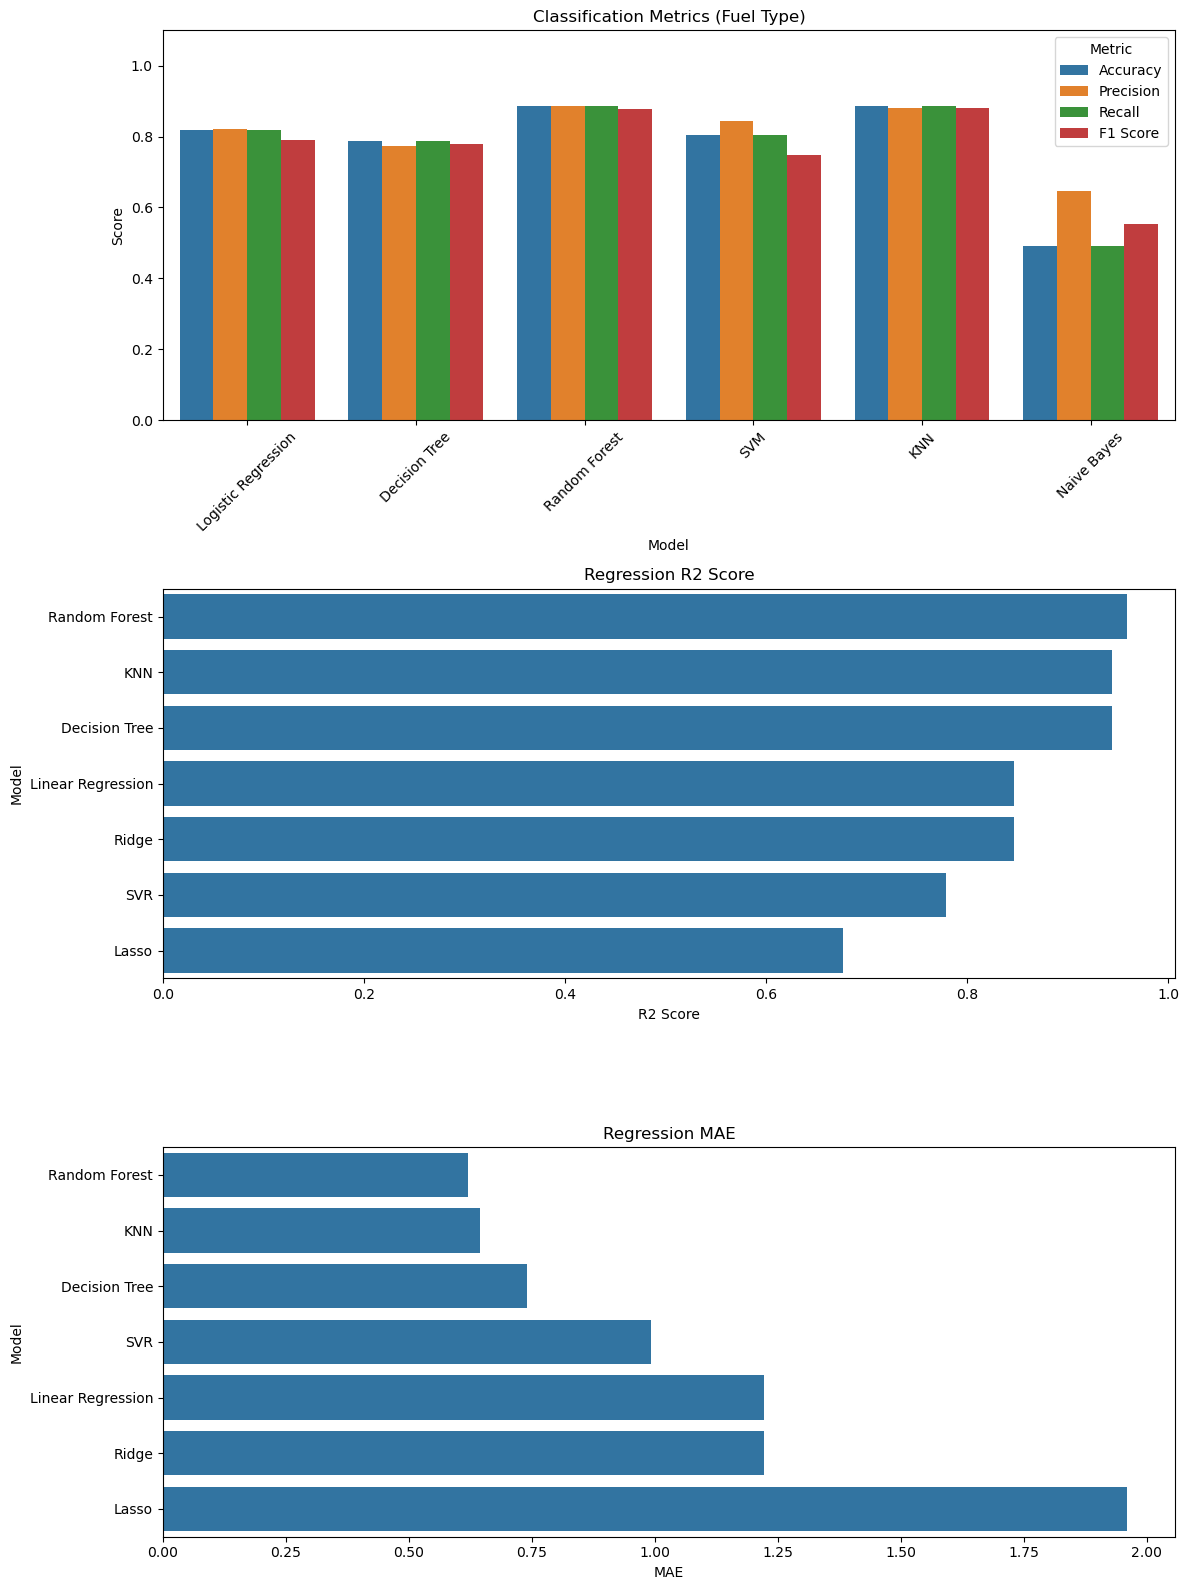

In [24]:
#Graphs
print("\nGenerating Graphs...")

df_cls = pd.DataFrame(cls_results)
df_reg = pd.DataFrame(reg_results)
df_cls_melt = df_cls.melt(id_vars="Model", var_name="Metric", value_name="Score")

fig, axes = plt.subplots(3, 1, figsize=(12, 16))

sns.barplot(x='Model', y='Score', hue='Metric', data=df_cls_melt, ax=axes[0])
axes[0].set_title('Classification Metrics (Fuel Type)')
axes[0].set_ylim(0, 1.1)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='R2 Score', y='Model',
            data=df_reg.sort_values('R2 Score', ascending=False),
            ax=axes[1])
axes[1].set_title('Regression R2 Score')

sns.barplot(x='MAE', y='Model',
            data=df_reg.sort_values('MAE'),
            ax=axes[2])
axes[2].set_title('Regression MAE')

plt.tight_layout()
plt.show()